# Imports and helper functions

In [218]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_som.som import SOM


# Task 4 - Clustering-based Anomaly detection

**Create and visualize the dataset**

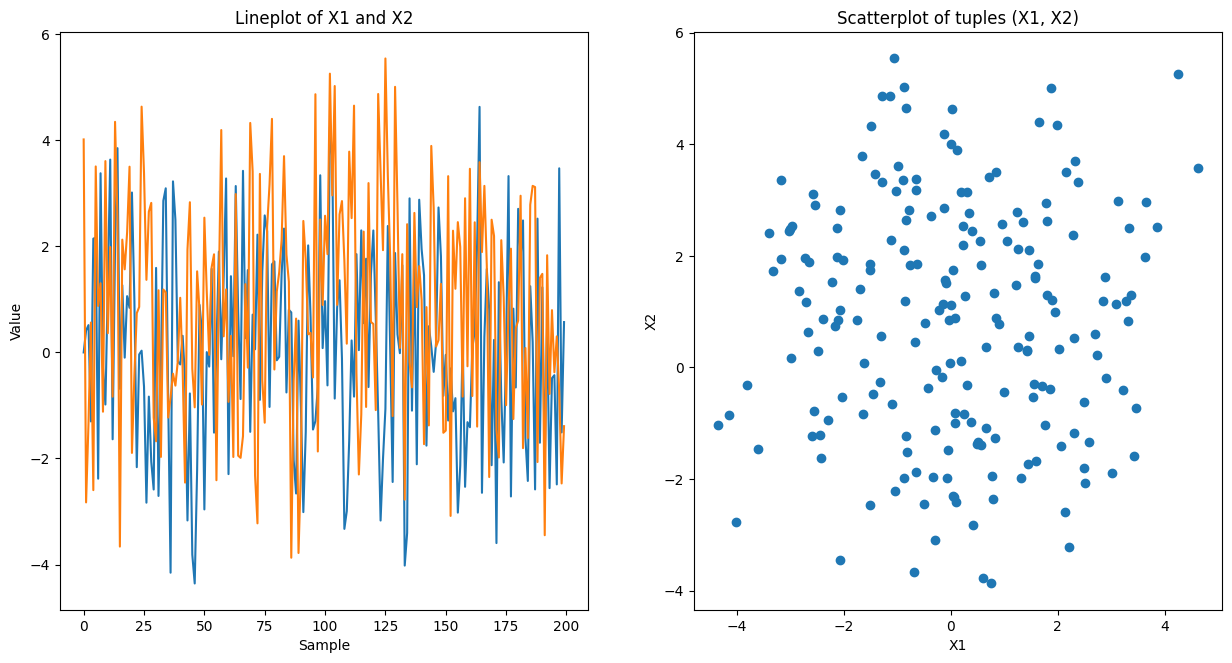

In [219]:
# random samples for X1 and X2
x1 = np.random.normal(0, 2, 200)
x2 = np.random.normal(1, 2, 200)
data = np.array([x1, x2]).T

fig, axes = plt.subplots(1, 2, figsize=(15, 7.5))
axes[0].plot(x1, label='X1')
axes[0].plot(x2, label='X2')
axes[0].title.set_text('Lineplot of X1 and X2')
axes[0].set_xlabel('Sample')
axes[0].set_ylabel('Value')

axes[1].scatter(x1, x2)
axes[1].title.set_text('Scatterplot of tuples (X1, X2)')
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')

plt.show()


## Constructing the K-Means model and showing the mappings

/Users/ludvigsmacbook/Documents/TEBSM 120HP/Årskurs 1/IL2233 Embedded- Intelligence/project/source/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


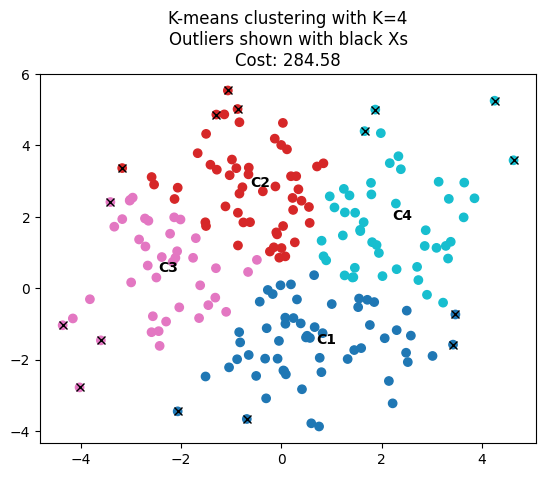

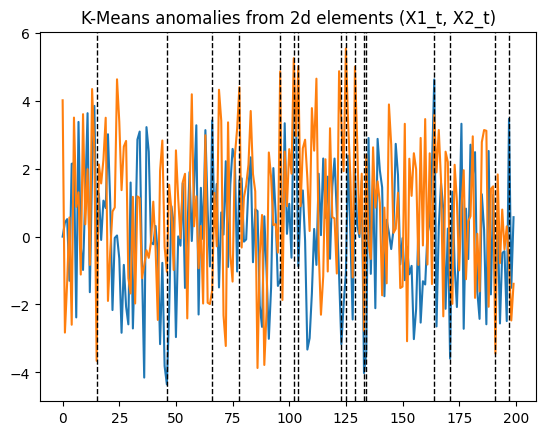

In [220]:
K = 4
model = KMeans(n_clusters=K)
kmeans_mappings = model.fit_predict(data)
centroids = model.cluster_centers_

plt.scatter(x1, x2, c=kmeans_mappings, cmap='tab10')

kmeans_anomalies_idx = []
kmeans_cost = 0.0
for c in range(K):
    points_in_cluster = data[np.where(kmeans_mappings == c)]
    distances = np.linalg.norm(points_in_cluster - centroids[c], axis=1)
    kmeans_cost += np.sum(distances)
    outliers = points_in_cluster[np.argsort(-distances)][:int(0.02 * len(x1))]

    plt.plot(outliers[:, 0], outliers[:, 1], 'kx')
    plt.text(centroids[c, 0], centroids[c, 1], f'C{c+1}', weight='bold')
    kmeans_anomalies_idx.append(np.where(np.isin(data, outliers).all(axis=1))[0])
plt.title(f'K-means clustering with K={K}\nOutliers shown with black Xs\nCost: {kmeans_cost:.2f}')
plt.show()

plt.plot(x1)
plt.plot(x2)
for anomaly in kmeans_anomalies_idx:
    for idx in anomaly:
        plt.axvline(idx, color='k', linestyle='--', linewidth=1)
plt.title('K-Means anomalies from 2d elements (X1_t, X2_t)')
plt.show()

## Constructing the SOM model and displaying the mappings

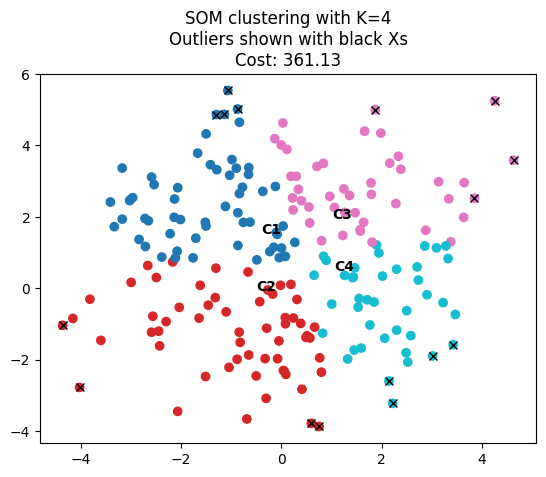

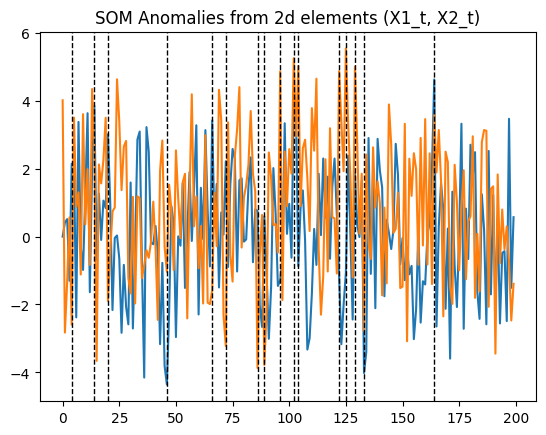

In [221]:
model = SOM(m=2, n=2, dim=2)
som_mappings = model.fit_predict(data)
centroids = model.cluster_centers_.reshape(-1, 2)
K = len(centroids)

som_anomalies_idx = []
som_cost = 0.0
plt.scatter(x1, x2, c=som_mappings, cmap='tab10')
for c in range(K):
    points_in_cluster = data[np.where(som_mappings == c)]
    distances = np.linalg.norm(points_in_cluster - centroids[c], axis=1)
    som_cost += np.sum(distances)
    outliers = points_in_cluster[np.argsort(-distances)][:int(0.02 * len(x1))]

    plt.plot(outliers[:, 0], outliers[:, 1], 'kx')
    plt.text(centroids[c, 0], centroids[c, 1], f'C{c+1}', weight='bold')
    som_anomalies_idx.append(np.where(np.isin(data, outliers).all(axis=1))[0])
        
plt.title(f'SOM clustering with K={K}\nOutliers shown with black Xs\nCost: {som_cost:.2f}')
plt.show()

plt.plot(x1)
plt.plot(x2)
for anomaly in som_anomalies_idx:
    for idx in anomaly:
        plt.axvline(idx, color='k', linestyle='--', linewidth=1)
plt.title('SOM Anomalies from 2d elements (X1_t, X2_t)')
plt.show()

**Comparison between the two clustering methods**

In [225]:
kmeans_anomalies_idx = np.array(kmeans_anomalies_idx).flatten()
som_anomalies_idx = np.array(som_anomalies_idx).flatten()
print(f'Number of anomalies found with K-Means: {len(kmeans_anomalies_idx)}')
print(f'Number of anomalies found with SOM: {len(som_anomalies_idx)}')
print(f'K-Means cost: {kmeans_cost:.2f}')
print(f'SOM cost: {som_cost:.2f}')
print(f'Cost difference: {np.abs(kmeans_cost - som_cost):.2f}')
not_in_som = data[np.where(np.isin(kmeans_anomalies_idx, som_anomalies_idx) == False)]
print(f'K-means anomalies not in SOM: \n{not_in_som}')
print(f'{len(not_in_som)}/{len(kmeans_anomalies_idx)} anomalies found with K-Means are not found with SOM')

Number of anomalies found with K-Means: 16
Number of anomalies found with SOM: 16
K-Means cost: 284.58
SOM cost: 361.13
Cost difference: 76.55
K-means anomalies not in SOM: 
[[-2.12715578e-03  4.01345039e+00]
 [ 5.13422158e-01 -1.33095881e+00]
 [-1.30273316e+00  5.62074704e-01]
 [-2.38148340e+00  8.74107813e-01]
 [ 1.26125228e+00  3.60102280e-01]
 [ 3.63354855e+00  1.98527151e+00]
 [-1.63877494e+00 -8.35827668e-01]]
7/16 anomalies found with K-Means are not found with SOM
